In [11]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Familiar stack packages
import numpy as np
import astropy.table as astTable
from lsst.daf.butler import Butler
import lsst.geom as geom
from astropy.io import ascii as astascii
import fitsio
import glob

from lsst.skymap.ringsSkyMap import RingsSkyMap, RingsSkyMapConfig
from lsst.geom import SpherePoint, degrees
import os
from astropy.visualization import ZScaleInterval
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.integrate as integrate
import lsst.afw.image as afwImage
import lsst.afw.table as afwTable

In [36]:
# Set up the configuration
config = RingsSkyMapConfig()
config.numRings = 120
config.projection = "TAN"
config.tractOverlap = 1.0 / 60  # degrees
config.pixelScale = 0.168  # arcsec/pixel
skyMap = RingsSkyMap(config)
coord = SpherePoint(33.75 * degrees, -3.27 * degrees)
# 3. Find the tract containing this coordinate
tractInfo = skyMap.findTract(coord)
tract_id = tractInfo.getId()
patchInfo = tractInfo.findPatch(coord)
patch_id = patchInfo.getSequentialIndex()
print(tract_id, patch_id)

8765 60


In [51]:
band = "y"
image_dir = (
    "/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_calexp"
)
files = glob.glob(os.path.join(image_dir, f"{tract_id}/{patch_id}/{band}/*"))
fname = files[0]
exposure = afwImage.ExposureF.readFits(fname)

In [52]:
mask_plane_dict = exposure.getMask().getMaskPlaneDict()
for name, bit in mask_plane_dict.items():
    print(f"{name}: bit {bit}")

BAD: bit 0
BRIGHT_OBJECT: bit 10
CLIPPED: bit 11
CR: bit 3
CROSSTALK: bit 12
DETECTED: bit 5
DETECTED_NEGATIVE: bit 6
EDGE: bit 4
INEXACT_PSF: bit 13
INTRP: bit 2
NOT_DEBLENDED: bit 14
NO_DATA: bit 8
REJECTED: bit 15
SAT: bit 1
SENSOR_EDGE: bit 16
STREAK: bit 17
SUSPECT: bit 7
UNMASKEDNAN: bit 18
VIGNETTED: bit 9


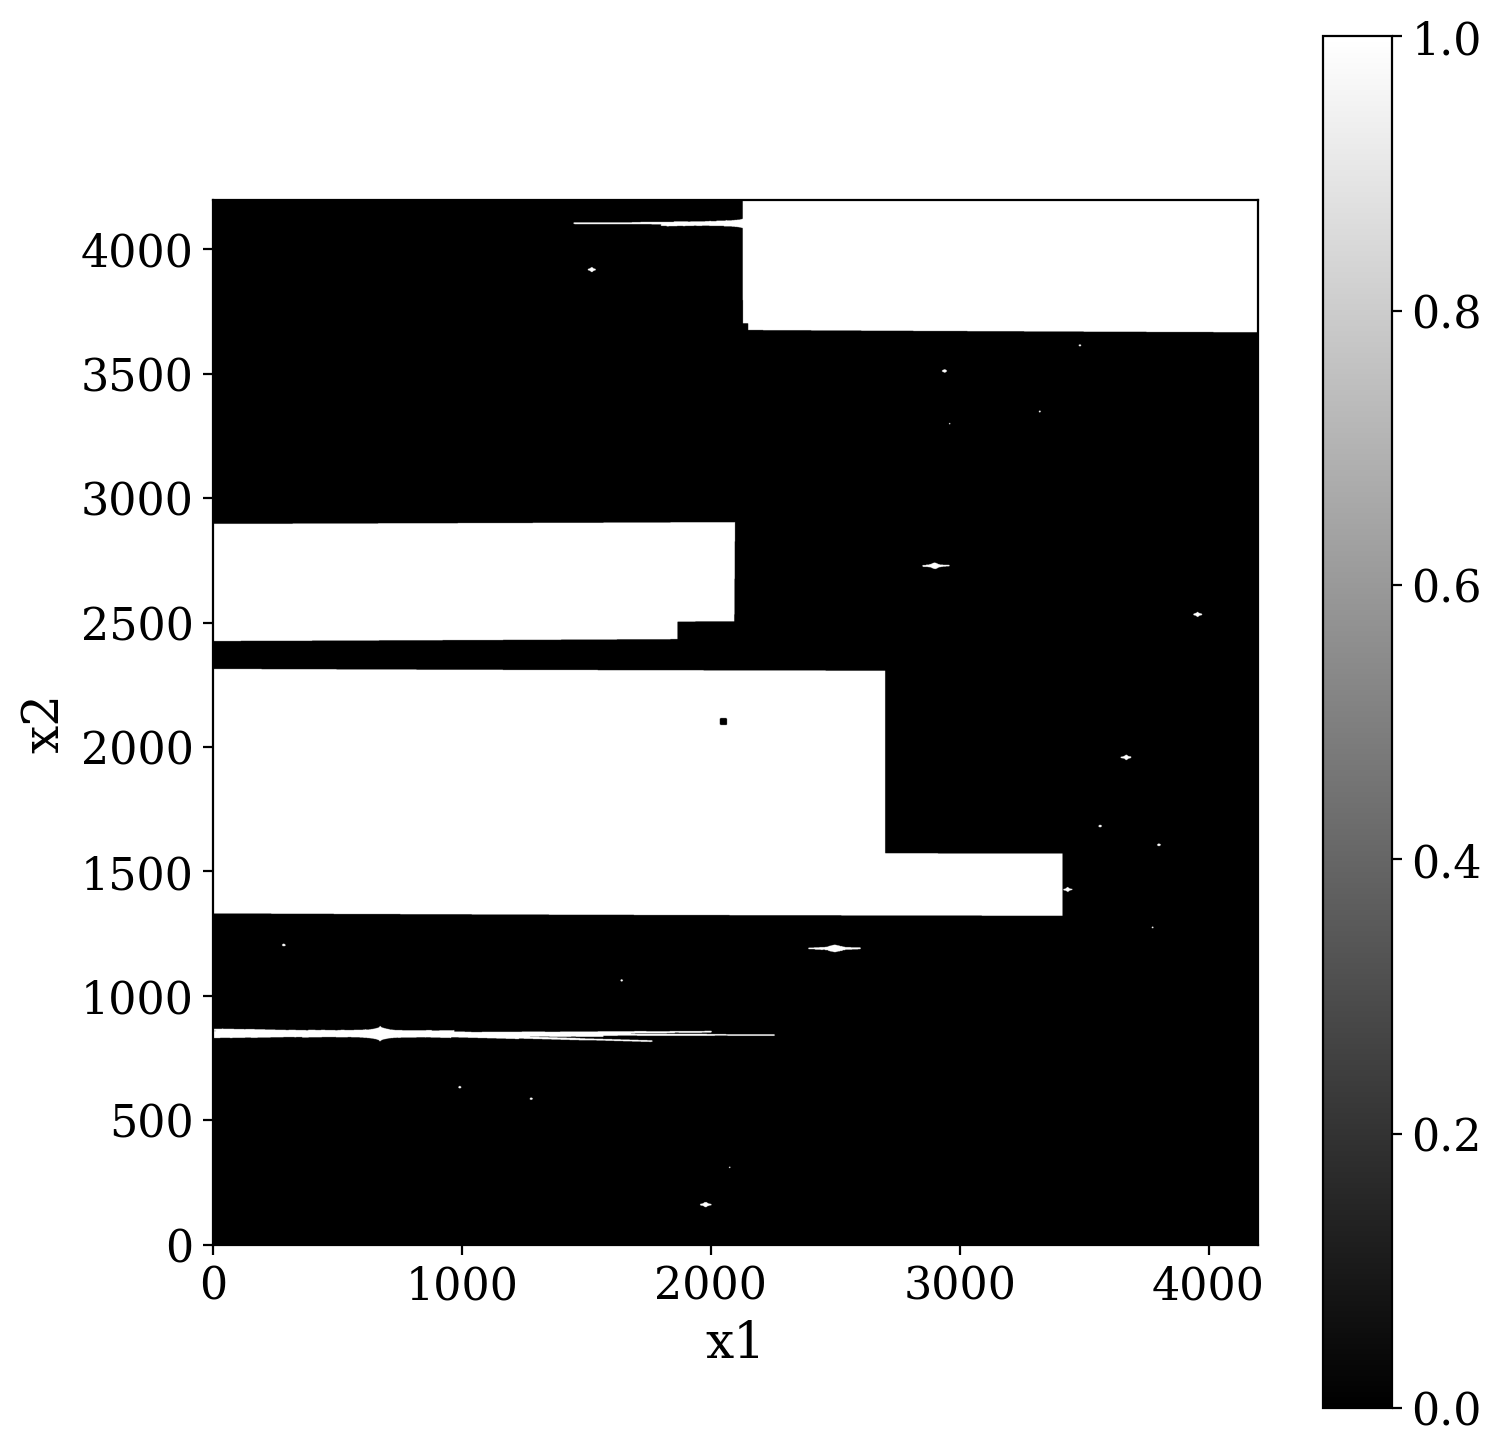

In [53]:
image = (exposure.mask.array  & 2**mask_plane_dict["REJECTED"]) > 0
# Use ZScale for a good display stretch (common in astronomy)
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(image)

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(image, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)

ax.set_xlabel("x1")
ax.set_ylabel("x2")

plt.tight_layout()
plt.colorbar(im)
plt.show()

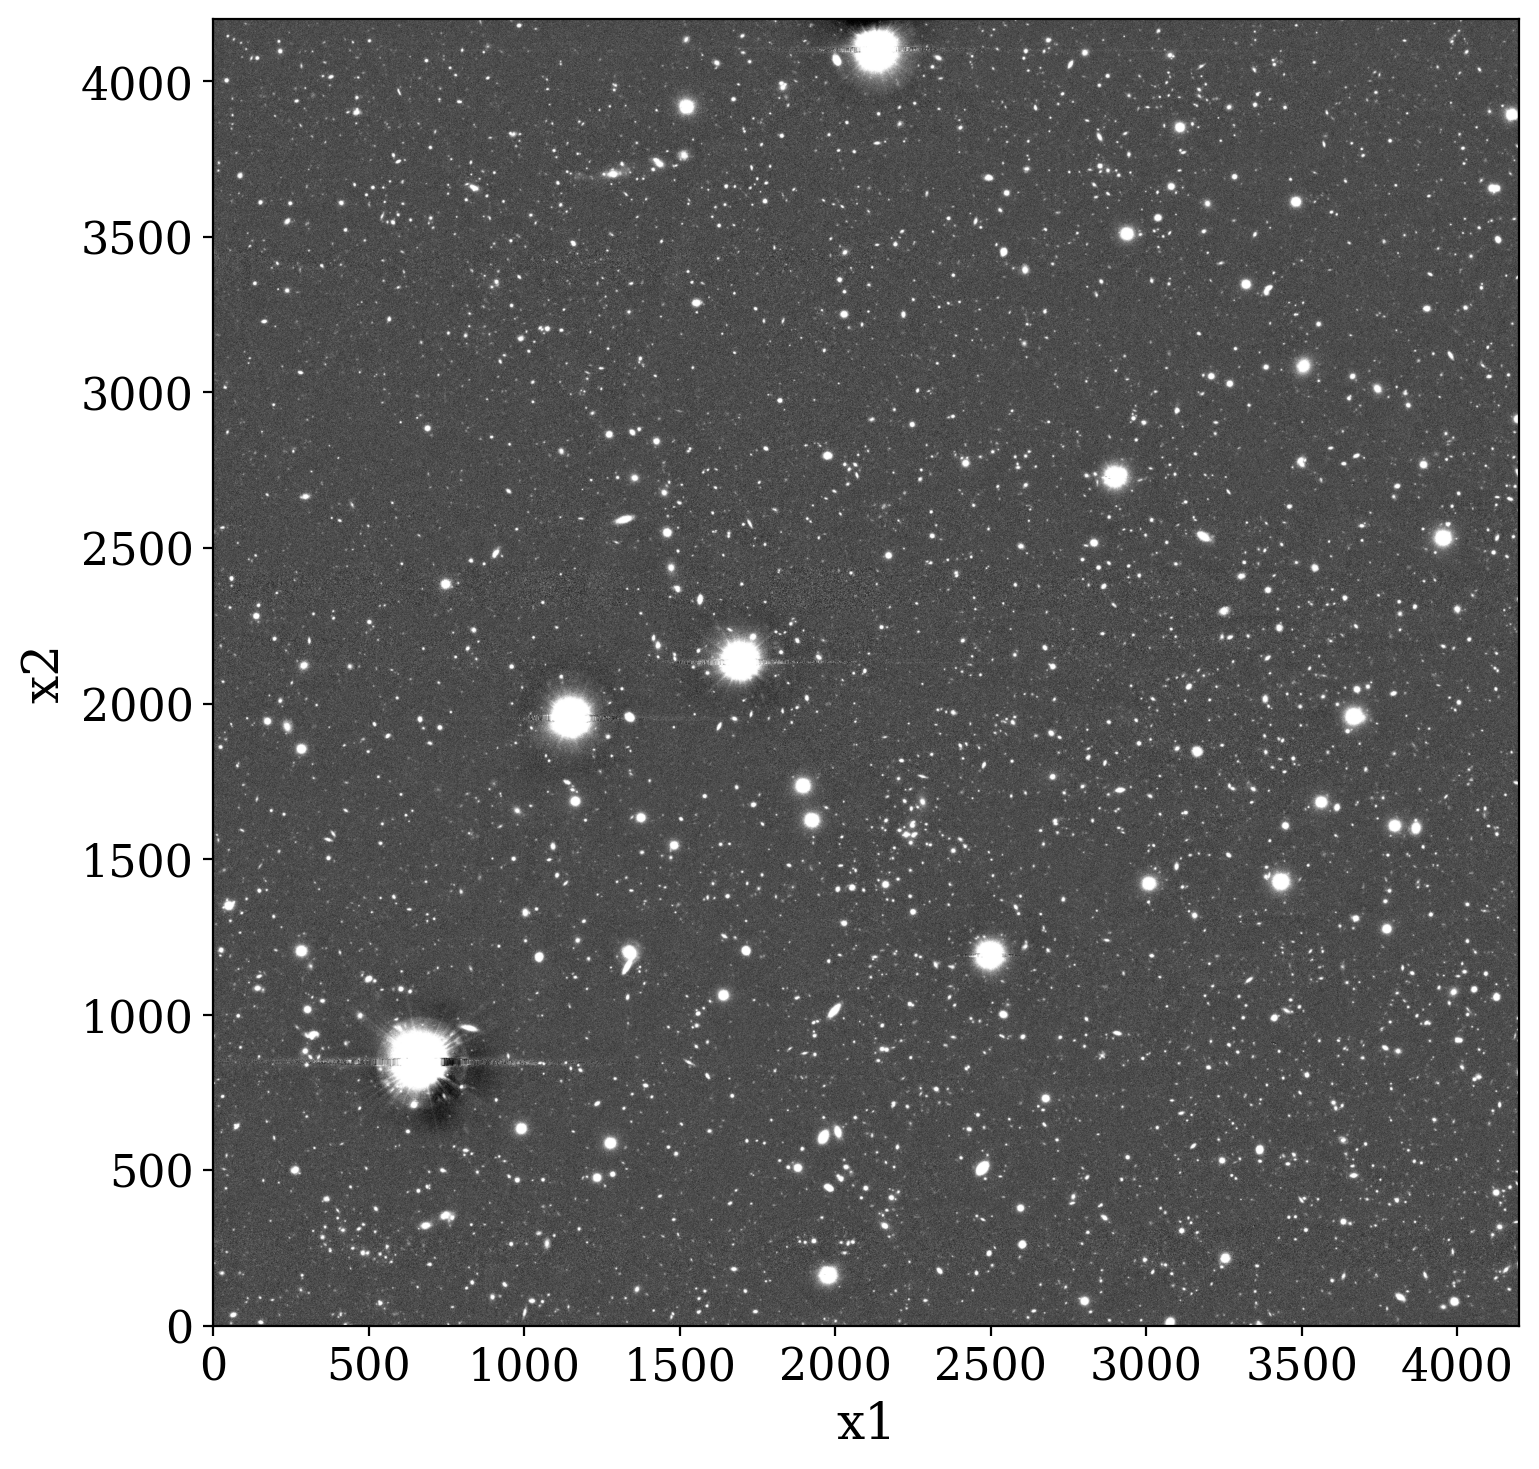

In [50]:
image = exposure.image.array
# Use ZScale for a good display stretch (common in astronomy)
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(image)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)

ax.set_xlabel("x1")
ax.set_ylabel("x2")

plt.tight_layout()
plt.show()